# Classification

Getting into classification models.

MNIST dataset:

In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.datasets import get_data_home
print(get_data_home())

C:\Users\apasi\scikit_learn_data


In [4]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [5]:
X, y = mnist["data"],mnist["target"]

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


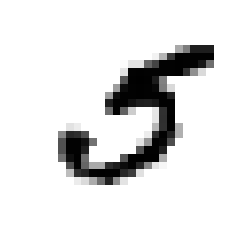

In [6]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_img = some_digit.reshape(28,28)

plt.imshow(some_digit_img, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [7]:
y[36000]

5.0

In [8]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [9]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index],y_train[shuffle_index]

## Binary Classifier

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [12]:
sgd_clf.predict([some_digit])

array([False])

### Testing the classifier

In [13]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95825, 0.95005, 0.94045])

#### Cross validation implementation

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct/len(y_pred))

0.95825
0.95005
0.94045


Estimator for not 5 variants:

In [15]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X,y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never5clf = Never5Classifier()
cross_val_score(never5clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9119 , 0.908  , 0.90905])

Confusion matrix test:

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[54415,   164],
       [ 2861,  2560]], dtype=int64)

precision and recall:

In [18]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.9397944199706314
0.47223759453975284


F1 score:

In [19]:
from sklearn.metrics import f1_score

print(f1_score(y_train_5, y_train_pred))

0.6286065070595458


Recall and precision compromise:

In [20]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)

threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[-39050.03077143]
[False]


In [21]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[False]


In [22]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method="decision_function")
y_scores

array([ -571717.97788403, -1172297.28424872, -1026636.95758043, ...,
        -514009.64986895,  -761262.17351335,  -664331.98978109])

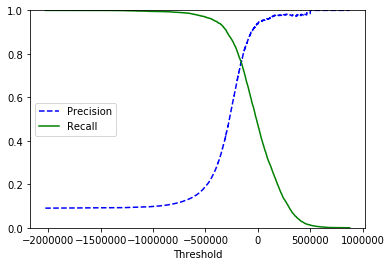

In [23]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()
    

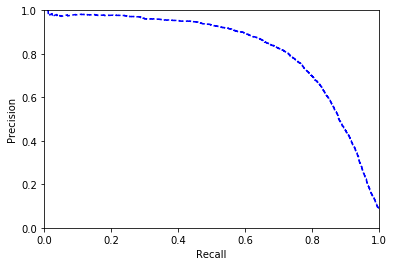

In [24]:
plt.plot(recalls[:-1], precisions[:-1], "b--")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

In [25]:
y_train_pred_90 = (y_scores>70000)

print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.9579158316633266
0.3527024534218779


ROC curve

<function matplotlib.pyplot.show(*args, **kw)>

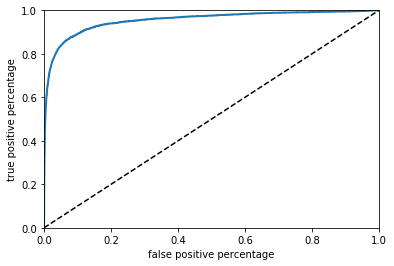

In [26]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("false positive percentage")
    plt.ylabel("true positive percentage")
    
plot_roc_curve(fpr,tpr)
plt.show
    

AUC score (area under curve):

In [27]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9548240397487895

Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_probas_forest

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [29]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

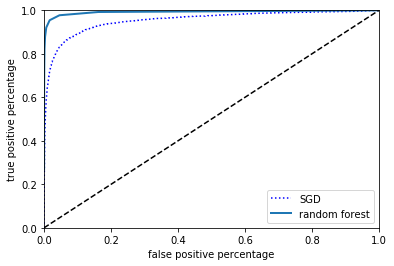

In [30]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest,tpr_forest, "random forest")
plt.legend(loc = "lower right")
plt.show()

In [31]:
roc_auc_score(y_train_5, y_scores_forest)

0.9924885379528976

## Multi-class classification

In [32]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5.])

In [33]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -73029.1797388 , -598271.88981443, -174446.82400731,
        -173091.73236807, -483868.40452018,  -39050.03077143,
        -754736.0648875 , -325935.33730697, -763618.94162007,
        -573643.20630827]])

In [34]:
print(np.argmax(some_digit_scores))
print(sgd_clf.classes_)
print(sgd_clf.classes_[5])

5
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
5.0


OvO and OvR

In [35]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovo_clf.fit(X_train, y_train)
print(ovo_clf.predict([some_digit]))
print(len(ovo_clf.estimators_))

[5.]
45


In [36]:
forest_clf.fit(X_train, y_train)
print(forest_clf.predict([some_digit]))
print(forest_clf.predict_proba([some_digit]))

[5.]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [37]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.86067786, 0.86619331, 0.87688153])

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.90961808, 0.90969548, 0.9093364 ])

Error analisys:

In [39]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
cmat = confusion_matrix(y_train, y_train_pred)
cmat

array([[5739,    3,   18,    7,   12,   54,   44,    7,   37,    2],
       [   2, 6450,   44,   30,    6,   49,    7,   11,  131,   12],
       [  59,   33, 5313,  105,   76,   26,  104,   64,  162,   16],
       [  48,   36,  138, 5354,    2,  231,   33,   58,  145,   86],
       [  19,   26,   41,    8, 5363,   12,   54,   30,   80,  209],
       [  69,   39,   33,  175,   72, 4614,  110,   29,  185,   95],
       [  36,   22,   39,    2,   45,   89, 5634,    7,   42,    2],
       [  23,   18,   70,   28,   62,   12,    5, 5790,   17,  240],
       [  51,  150,   75,  160,   16,  158,   54,   29, 5028,  130],
       [  45,   32,   28,   87,  158,   36,    2,  196,   77, 5288]],
      dtype=int64)

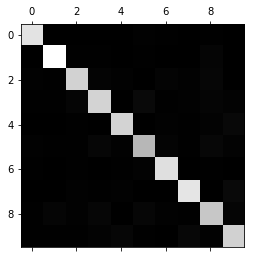

In [40]:
plt.matshow(cmat, cmap = plt.cm.gray)
plt.show()

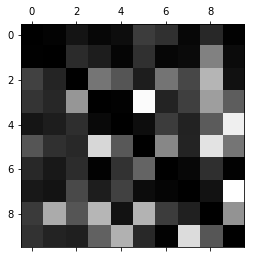

In [41]:
row_sums = cmat.sum(axis=1,keepdims=True)
norm_cmat = cmat/row_sums

np.fill_diagonal(norm_cmat, 0)
plt.matshow(norm_cmat, cmap=plt.cm.gray)
plt.show()